Problem statement:

-To predict Primary fuel

-To predict capacity

In [20]:
#loading the dataset

import pandas as pd
import numpy as np

df=pd.read_csv("powerplant.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing:

In [2]:
pd.set_option('display.max_columns',None)
df.sample(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
187,IND,India,DURG SPONGE IRON,WRI1019998,12.8,21.1878,81.2099,Coal,NaN,NaN,NaN,NaN,Jai Industries ltd,Jai Industries ltd,https://www.jaibalajigroup.com/power.html,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
802,IND,India,THAL WORKS,WRI1019989,30.0,18.7026,72.8709,Gas,NaN,NaN,NaN,NaN,Rashtriya & fert,Rashtriya & fert,http://www.rcfltd.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,IND,India,Megha Solar Plant,WRI1020245,50.0,NaN,NaN,Solar,NaN,NaN,NaN,2014.0,Megha Engineering and Infrastructure,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631,IND,India,RAJPURA DARIBA MINE,WRI1019897,160.0,24.9643,74.1197,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,IND,India,KOLLEGAL SUGAR,WRI1019922,16.0,12.1056,76.7606,Biomass,NaN,NaN,NaN,NaN,Bannari Sugars ltd,Bannari Sugars ltd,http://www.bannari.com/sugar.html,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,IND,India,MAHATMA GANDHI TPP,IND0000248,1320.0,28.4900,76.3510,Coal,Oil,NaN,NaN,2012.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,6147.80000,4638.57000,2709.41000,6889.57000,6435.0900,NaN,Central Electricity Authority,NaN
152,IND,India,CORE GREEN SUGAR,WRI1019911,24.0,16.5471,77.0825,Biomass,NaN,NaN,NaN,NaN,Core Fuels ltd,Core Fuels ltd,http://www.coregreen.in/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,IND,India,IEPL BELA TPP,IND0000150,270.0,20.8102,79.0556,Coal,Oil,NaN,NaN,2013.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,0.00000,0.00000,0.00000,72.82500,135.4910,NaN,Central Electricity Authority,NaN
452,IND,India,MAHUL REFINERY,WRI1019967,22.0,19.0162,72.8963,Oil,NaN,NaN,NaN,NaN,Bharat Corp ltd,Bharat Corp ltd,https://bharatpetroleum.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,IND,India,KOTESHWAR,IND0000214,400.0,30.2594,78.4971,Hydro,NaN,NaN,NaN,2011.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1204.11915,1241.80975,1218.42725,1214.22835,1217.7208,NaN,Central Electricity Authority,NaN


- The dataset have many null values present 
- Country , Country_long is one thing only as the dataset is for INDIA only
- Dataset has some not useful variables for building model like owner , source , url etc


In [4]:
df.shape

(907, 27)

In [3]:
#lets first check for missing values

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

- other_fuel1 , other_fuel2 , other_fuel3, wepp_id , generation_gwh_2013 ,  generation_gwh_2019 , estimated_generation_gwh have more than 80% missing values present there is no point in filling those null values
- other variables too have more than or around 50% null values , so if we try to use imputation technique our data might become biased
- so we are going to drop all the null values from the dataset


In [5]:
#importing some libraries

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

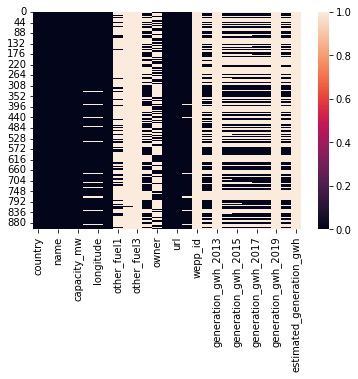

In [6]:
sns.heatmap(df.isnull())

In [21]:
#dropping variables with almost all null values

df.drop(['other_fuel1' , 'other_fuel2' , 'other_fuel3' , 'generation_gwh_2013' , 'wepp_id' , 'generation_gwh_2019' , 'estimated_generation_gwh'],axis=1,inplace=True)

In [22]:
#checking again for null values

df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [23]:
df.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
258,IND,India,HAZIRA CCCP,IND0000142,156.1,22.3256,69.7399,Gas,2001.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,206.54700,136.0644,23.37455,1.878,23.49600,Central Electricity Authority
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,2008.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,1887.90400,1643.0460,1338.09300,1563.457,1487.88000,Central Electricity Authority
552,IND,India,Nallakonda Wind Farm,WRI1026351,50.4,14.1651,77.5713,Wind,NaN,Tadas Wind Energy,CDM,https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,IND,India,MOYAR,IND0000275,36.0,11.6137,76.6919,Hydro,1952.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,144.00635,103.1218,61.21240,93.928,161.18005,Central Electricity Authority
163,IND,India,DANAPUR BMM,WRI1019912,25.0,15.1707,76.3770,Coal,NaN,Bmm Pvt ltd,Bmm Pvt ltd,http://jobs.cari.co.in/jobs/bmm-ispat-ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#since soruce and generation data source are percieving to be same thing , we will drop owner , generation_data_source , as they have many null values

df.drop(['generation_data_source','owner'],axis=1,inplace=True)

df.isnull().sum()              #checking again for null values

country                    0
country_long               0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [27]:
# for object dtype we will use mode strategy and for float dtype we will use mean strategy

#creating empty list for categorical and continuous variables which have null values

cat=[]
intt=[]

for i in df.columns:
    if df[i].isnull().sum()>0 and df[i].dtypes=='object':
        cat.append(i)
    elif df[i].isnull().sum()>0 and df[i].dtypes=='float64':
        intt.append(i)
    else:
        pass

print(cat,'\n')
print(intt)

['geolocation_source'] 

['latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [28]:
#now using imputation technique to fill the missing values

from sklearn.impute import SimpleImputer

for i in cat:
    df[i]=SimpleImputer(strategy='most_frequent').fit_transform(df[i].values.reshape(-1,1))

for j in intt:
    df[j]=SimpleImputer(strategy='mean').fit_transform(df[j].values.reshape(-1,1))
    
df.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

<AxesSubplot:>

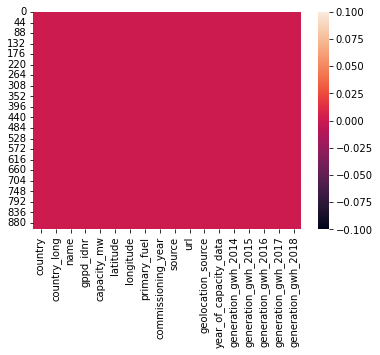

In [29]:
sns.heatmap(df.isnull())

In [30]:
#checking for dtypes

df.dtypes

country                   object
country_long              object
name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
commissioning_year       float64
source                    object
url                       object
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

In [32]:
#now commissioning_year is a variable for Year , so we will convert it's dtype to int 64

df['commissioning_year']=df['commissioning_year'].astype('int64')

In [33]:
#checking for dtypes

df.dtypes

country                   object
country_long              object
name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
commissioning_year         int64
source                    object
url                       object
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

In [34]:
#checking for unique value counts

for i in df.columns:
    print(df[i].value_counts(),'\n','\n')

IND    907
Name: country, dtype: int64 
 

India    907
Name: country_long, dtype: int64 
 

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64 
 

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64 
 

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64 
 

21.197918    46
19.000400     3
24.191700     3
31.268000     2
14.235200     2
             ..
22.755400     1
27.159800     1
17.

- the data is imbalanced
- name , gppd_idnr , source , url have almost all the values as unique, so it would be very tricky to encode these variables
-  country , country_long and year_of_capacity_data is same for all the dataset , so there's no point in keeping them 

In [35]:
df.drop(['name','gppd_idnr','source','url','country','country_long','year_of_capacity_data'],axis=1,inplace=True)

df.sample(4)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
29,113.6,18.8580,73.6396,Wind,1997,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
414,2000.0,8.1689,77.7126,Nuclear,1997,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
563,330.5,11.0749,79.8340,Gas,2001,WRI,1142.965769,152.252966,195.884661,0.000000,0.000000
17,600.0,23.0666,81.7841,Coal,1997,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [ ]:
#first we will perform a little EDA and then we will encode the two object dtype variables that are left

# EDA:

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    int64  
 5   geolocation_source   907 non-null    object 
 6   generation_gwh_2014  907 non-null    float64
 7   generation_gwh_2015  907 non-null    float64
 8   generation_gwh_2016  907 non-null    float64
 9   generation_gwh_2017  907 non-null    float64
 10  generation_gwh_2018  907 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 78.1+ KB


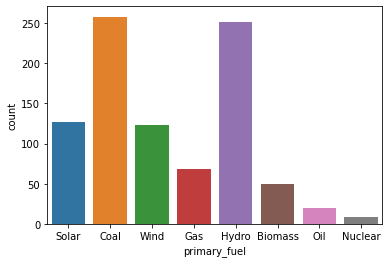

In [38]:
sns.countplot(df['primary_fuel'])
plt.show()

- the dataset is imabalanced as Coal and hydro have the highest counts , biomass , oil and Nuclear have very less count in the dataset

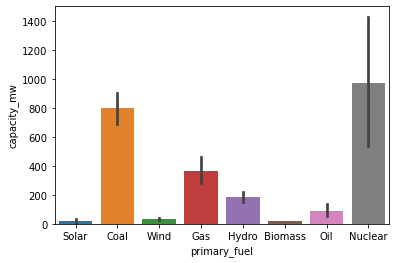

In [37]:
sns.barplot('primary_fuel','capacity_mw',data=df)
plt.show()

- Nuclear primary fuel has the highest capacity in mw
- Solar , Wind , Biomass have the least capacity
- After Nuclear coal has the highest capacity

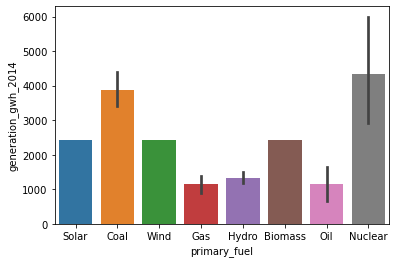

In [42]:
sns.barplot('primary_fuel','generation_gwh_2014',data=df)
plt.show()

- Nuclear had the highest generation in year 2014 following by coal
- Solar , Wind , Biomass had reasonable generation in the same year
- Gas had the lowest generation

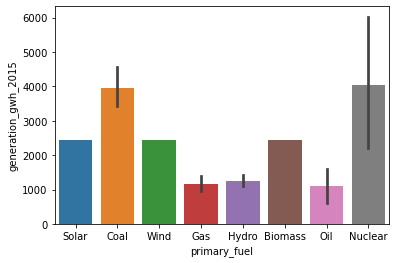

In [43]:
sns.barplot('primary_fuel','generation_gwh_2015',data=df)
plt.show()

- Nuclear and Coal generation were almost same in the year 2015, even after Nuclear capacity is pretty much than that of coal
-  all the other fuel's generation was same to that of 2014

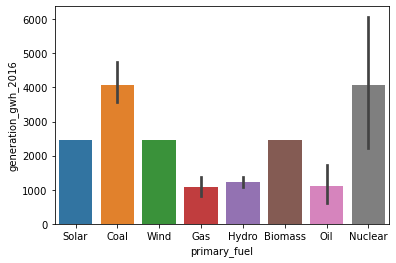

In [44]:
sns.barplot('primary_fuel','generation_gwh_2016',data=df)
plt.show()

- Nuclear and Coal generation were same in the year 2016, even after Nuclear capacity is pretty much than that of coal
-  all the other fuel's generation was same to that of 2014 and 2015

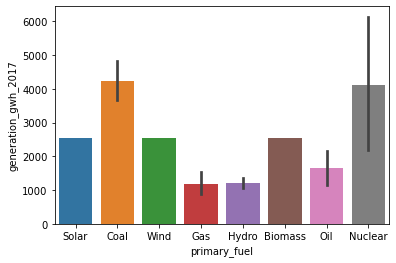

In [45]:
sns.barplot('primary_fuel','generation_gwh_2017',data=df)
plt.show()

- coal generation is slightly higher than nuclear in 2017
- oil generation has also increased in 2017 as compared to 2014,2015,2016

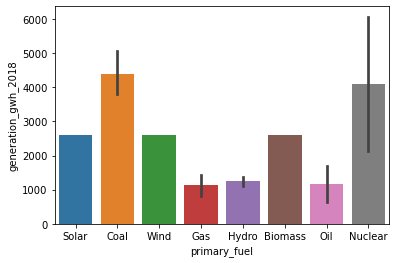

In [46]:
sns.barplot('primary_fuel','generation_gwh_2018',data=df)
plt.show()

- coal generation is slightly higher than nuclear in 2018 too
- oil generation has decreased in 2018 to that of 2017

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    int64  
 5   geolocation_source   907 non-null    object 
 6   generation_gwh_2014  907 non-null    float64
 7   generation_gwh_2015  907 non-null    float64
 8   generation_gwh_2016  907 non-null    float64
 9   generation_gwh_2017  907 non-null    float64
 10  generation_gwh_2018  907 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 78.1+ KB


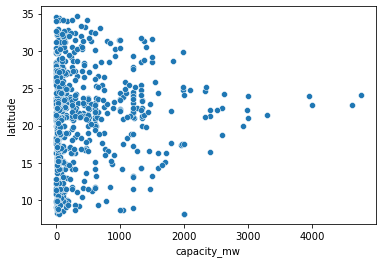

In [48]:
sns.scatterplot('capacity_mw','latitude',data=df)
plt.show()

- higher capacity is found to be around latitude 25-20

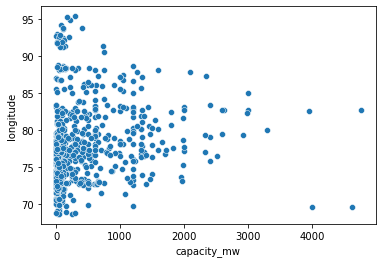

In [49]:
sns.scatterplot('capacity_mw','longitude',data=df)
plt.show()

- higher capacity is found to be around longitude 80-85

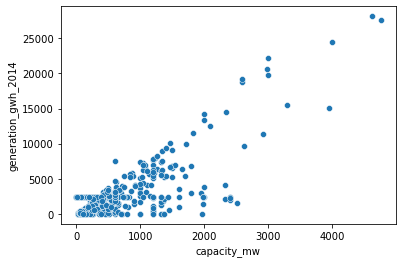

In [50]:
sns.scatterplot('capacity_mw','generation_gwh_2014',data=df)
plt.show()

- higher generation is associated with higher capacity
- low capacity means low generation

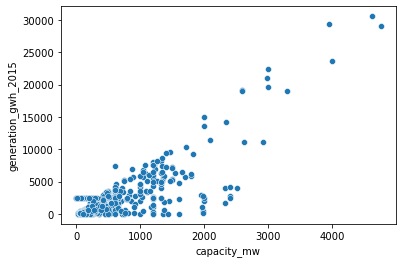

In [51]:
sns.scatterplot('capacity_mw','generation_gwh_2015',data=df)
plt.show()

- generation has exceeded 25000 in 2015 as compared to 2014

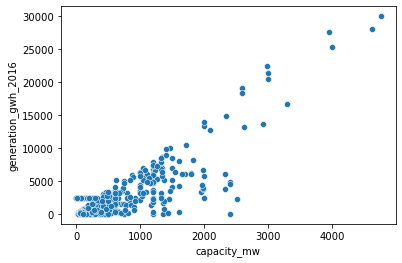

In [52]:
sns.scatterplot('capacity_mw','generation_gwh_2016',data=df)
plt.show()

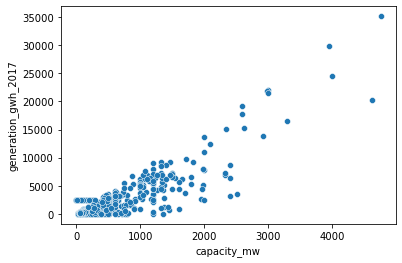

In [53]:
sns.scatterplot('capacity_mw','generation_gwh_2017',data=df)
plt.show()

- generation has exceeded 30000 in 2017 as compared to 2014,2015,2016

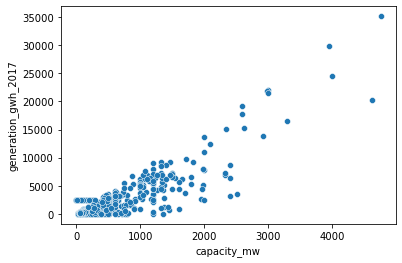

In [54]:
sns.scatterplot('capacity_mw','generation_gwh_2017',data=df)
plt.show()

- generation has a linear relationship with positive slope with capacity_mw

In [55]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year       int64
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [56]:
#now lets LabelEncode the object datatype variables

cat=[]  #creating an empty list for categorical variables
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        pass
    

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in cat:
    df[i]=le.fit_transform(df[i])
    
df.sample()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
804,22.5,19.0875,73.0258,5,1997,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099


In [57]:
#checking for correlation

df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.275711,2.048653e-01,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01
latitude,0.050984,1.000000,0.036362,-0.010204,0.102375,-1.842751e-01,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02
longitude,0.195882,0.036362,1.000000,-0.347948,0.093778,2.523426e-01,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,-0.128308,-4.832168e-01,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01
commissioning_year,0.275711,0.102375,0.093778,-0.128308,1.000000,-6.285458e-03,1.330497e-01,1.473367e-01,1.706430e-01,1.708621e-01,1.743756e-01
geolocation_source,0.204865,-0.184275,0.252343,-0.483217,-0.006285,1.000000e+00,1.557310e-17,-6.339264e-18,1.115708e-17,-9.450976e-18,-1.048582e-17
generation_gwh_2014,0.694350,0.044321,0.011472,-0.124769,0.133050,1.557310e-17,1.000000e+00,9.535943e-01,9.258738e-01,8.916868e-01,8.849556e-01
generation_gwh_2015,0.711190,0.036398,0.018818,-0.124828,0.147337,-6.339264e-18,9.535943e-01,1.000000e+00,9.688877e-01,9.282425e-01,9.234611e-01
generation_gwh_2016,0.742221,0.031256,0.039209,-0.131051,0.170643,1.115708e-17,9.258738e-01,9.688877e-01,1.000000e+00,9.646488e-01,9.571589e-01
generation_gwh_2017,0.757585,0.031212,0.039675,-0.132003,0.170862,-9.450976e-18,8.916868e-01,9.282425e-01,9.646488e-01,1.000000e+00,9.826888e-01


In [58]:
df.corr()['primary_fuel'].sort_values(ascending=False)

primary_fuel           1.000000
latitude              -0.010204
generation_gwh_2014   -0.124769
generation_gwh_2015   -0.124828
commissioning_year    -0.128308
generation_gwh_2016   -0.131051
generation_gwh_2017   -0.132003
generation_gwh_2018   -0.136983
longitude             -0.347948
capacity_mw           -0.380395
geolocation_source    -0.483217
Name: primary_fuel, dtype: float64

- so no variable have a positive correlation with the target variable

<Figure size 432x288 with 0 Axes>

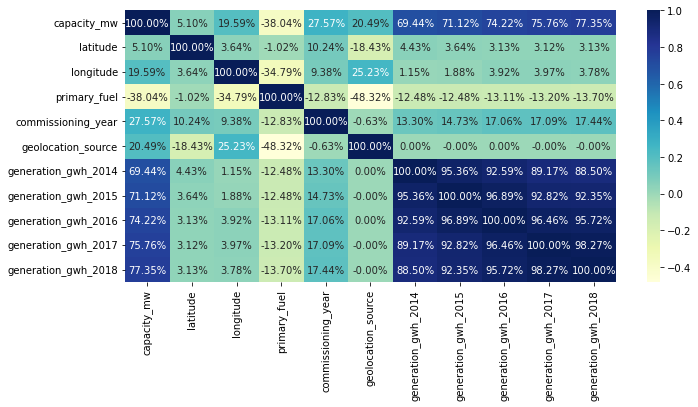

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=(11,5))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2%')
plt.figure()

In [60]:
# now let's, describe our dataset:

df.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,1997.052922,1.733186,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,2.280652,13.016438,0.677151,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,1997.000000,2.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,3.000000,1997.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,6.000000,2003.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,7.000000,2018.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


observations:
- capacity_mw might has skewness
- outliers might also present

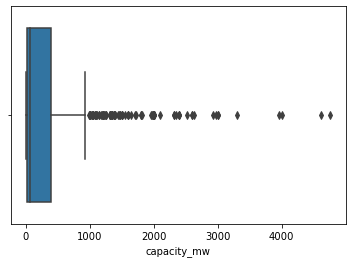

In [61]:
#let's check for outliers

sns.boxplot(df['capacity_mw'])
plt.show()

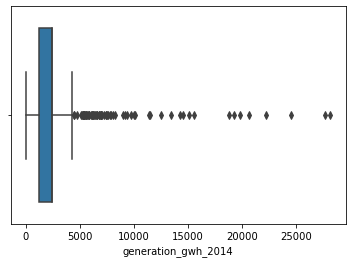

In [62]:
sns.boxplot(df['generation_gwh_2014'])
plt.show()

- okay so outliers are there

# Data Cleaning:

In [63]:
#lets check out for outliers using zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

#threhold=3
np.where(z>3)

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
        179, 183, 209, 209, 209, 209, 209, 209, 222, 244, 308, 308, 308,
        308, 308, 308, 323, 333, 340, 342, 360, 363, 364, 364, 364, 364,
        364, 364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493, 493,
        493, 493, 493, 493, 494, 494, 494, 494, 494, 494, 499, 519, 538,
        541, 546, 573, 577, 583, 592, 601, 621, 638, 648, 648, 648, 648,
        648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695, 695,
        695, 706, 709, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
        726, 726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786, 786,
        788, 807, 808, 808, 808, 808, 808, 808, 818, 847, 848, 880, 880,
        880, 880, 880, 880], dtype=int64),
 array([ 0,  7,  8,  9, 10,  0,  6,  7,  8,  9, 10,  0,  6,  2,  2,  0,  6,
         7,  8,  9, 10,  4,  2,  0,  6,  7,  8,  9, 10,  2,  2,  2,  4,  2,
         0,  0,  6,  7,  8,  9, 10,  4,  0,  2,  2,  4,  4,  4,  0,  4,  0,

In [64]:
#so outliers are present, so we are going to see how much data is being lost

df_new=df[(z<3).all(axis=1)]

In [65]:
df.shape

(907, 11)

In [66]:
df_new.shape

(849, 11)

In [67]:
print('Data Loss is:',(907-849)/907*100,'%')

Data Loss is: 6.39470782800441 %


- so data loss is less than 10%, so we will use dataset with no outliers, as due to imbalance data we are going to do over sampling later

In [68]:
# now selecting our feature and target variable for further process

x=df_new.drop('primary_fuel',axis=1)
y=df_new['primary_fuel']

print(x.shape)
print(y.shape)

(849, 10)
(849,)


In [69]:
#checking for skewness

x.skew()

capacity_mw            1.979914
latitude              -0.109823
longitude              0.921980
commissioning_year    -0.834063
geolocation_source    -2.062603
generation_gwh_2014    1.526648
generation_gwh_2015    1.389889
generation_gwh_2016    1.413144
generation_gwh_2017    1.278735
generation_gwh_2018    1.315481
dtype: float64

- threshold= +/- 0.50 , all feature variables except latitude are exceeding the threshold for skewness , so we will try to reduce skewness present

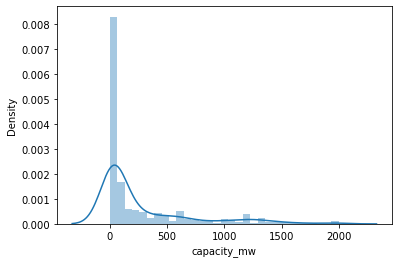

In [70]:
sns.distplot(x['capacity_mw'])
plt.show()

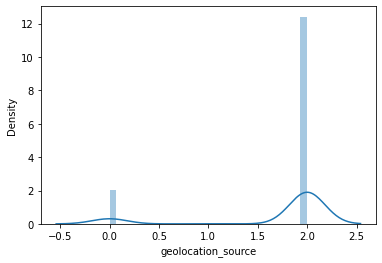

In [71]:
sns.distplot(x['geolocation_source'])
plt.show()

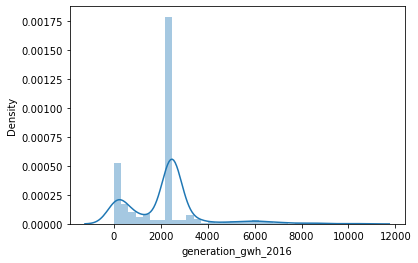

In [72]:
sns.distplot(x['generation_gwh_2016'])
plt.show()

- the data is exceeding the normal distribution curves. so dataset is skewed

In [73]:
x.columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [74]:
#using power_transform method

from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')
x=pd.DataFrame(x,columns=['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'])
x.skew()

capacity_mw            0.015527
latitude              -0.069694
longitude              0.000035
commissioning_year     0.031527
geolocation_source    -2.035892
generation_gwh_2014   -0.243975
generation_gwh_2015   -0.309166
generation_gwh_2016   -0.309194
generation_gwh_2017   -0.340677
generation_gwh_2018   -0.354764
dtype: float64

- skewness has been reduced , except for geolocation_source

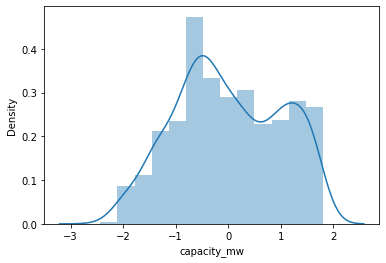

In [75]:
sns.distplot(x['capacity_mw'])
plt.show()

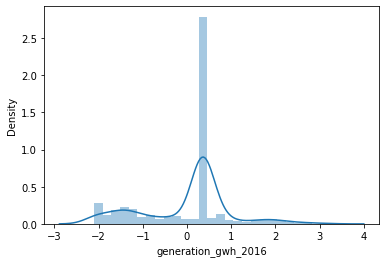

In [76]:
sns.distplot(x['generation_gwh_2016'])
plt.show()

In [77]:
#checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [78]:
vif_calc()

   VIF Factor             features
0    1.544160          capacity_mw
1    1.088996             latitude
2    1.209424            longitude
3    1.175633   commissioning_year
4    1.469682   geolocation_source
5    4.195664  generation_gwh_2014
6    8.040070  generation_gwh_2015
7   11.896941  generation_gwh_2016
8   11.646432  generation_gwh_2017
9   12.367371  generation_gwh_2018


- as the vif for some features is above 10 , we are going to drop feature variables with high VIF and weak correlation to reduce multicollinearity

In [79]:
x.drop('generation_gwh_2018',axis=1,inplace=True)

#now checking for vif

vif_calc()

   VIF Factor             features
0    1.542553          capacity_mw
1    1.088960             latitude
2    1.208789            longitude
3    1.174937   commissioning_year
4    1.469340   geolocation_source
5    4.159316  generation_gwh_2014
6    8.023000  generation_gwh_2015
7   11.013528  generation_gwh_2016
8    5.589526  generation_gwh_2017


In [80]:
x.drop('generation_gwh_2016',axis=1,inplace=True)

#now checking for vif

vif_calc()

   VIF Factor             features
0    1.541962          capacity_mw
1    1.088091             latitude
2    1.202761            longitude
3    1.158547   commissioning_year
4    1.469130   geolocation_source
5    4.158994  generation_gwh_2014
6    5.194121  generation_gwh_2015
7    2.954358  generation_gwh_2017


- okay so VIF have been reduced

In [81]:
#scaling the input data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [82]:
#now checking if the dataset is imbalanced or not

y.value_counts()

1    235
3    221
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

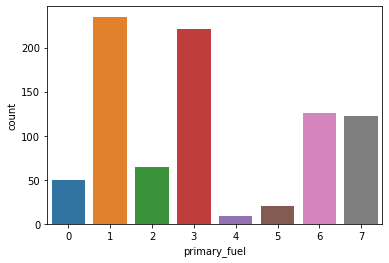

In [83]:
sns.countplot(y)
plt.show()

- the dataset is imbalanced so we will do over_sampling using SMOTE

In [84]:
from imblearn.over_sampling import SMOTE

train_x,train_y=SMOTE().fit_resample(x,y)

print(train_x.shape)
print(train_y.shape)

(1880, 8)
(1880,)


In [85]:
#since this is classification problem so we will try out classification algorithms for best results

In [86]:
#importing libraries

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [91]:
#KNeighbors

knn=KNeighborsClassifier()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=i,test_size=.30)
    knn.fit(x_train,y_train)
    predtrain=knn.predict(x_train)
    predknn=knn.predict(x_test)
    if round(accuracy_score(y_test,predknn)*100)==86:
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',accuracy_score(y_train,predtrain)*100)
        print('Testing accuracy score is',accuracy_score(y_test,predknn)*100,'\n')

At random state 1 the model performs very well
At random state 1 :
Training accuracy score is 90.19756838905775
Testing accuracy score is 86.17021276595744 

At random state 4 the model performs very well
At random state 4 :
Training accuracy score is 89.28571428571429
Testing accuracy score is 85.63829787234043 

At random state 10 the model performs very well
At random state 10 :
Training accuracy score is 89.36170212765957
Testing accuracy score is 86.17021276595744 

At random state 15 the model performs very well
At random state 15 :
Training accuracy score is 88.60182370820668
Testing accuracy score is 85.63829787234043 

At random state 19 the model performs very well
At random state 19 :
Training accuracy score is 89.05775075987842
Testing accuracy score is 86.17021276595744 

At random state 23 the model performs very well
At random state 23 :
Training accuracy score is 89.13373860182371
Testing accuracy score is 86.17021276595744 

At random state 29 the model performs very w

In [92]:
#using 63 as the random state for further process

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=63,test_size=.30)
knn.fit(x_train,y_train)
predtrain=knn.predict(x_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))

0.8599290780141844


In [94]:
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

85.99290780141844
[[71  0  0  0  0  0  0  2]
 [ 5 43  7  5  3  1  0  3]
 [ 0  5 61  1  0  8  0  2]
 [ 2  7  1 46  1  2  0  4]
 [ 0  1  0  0 67  0  0  0]
 [ 1  1  2  0  0 67  0  0]
 [ 0  0  0  0  0  0 72  0]
 [ 7  2  2  0  0  4  0 58]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        73
           1       0.73      0.64      0.68        67
           2       0.84      0.79      0.81        77
           3       0.88      0.73      0.80        63
           4       0.94      0.99      0.96        68
           5       0.82      0.94      0.88        71
           6       1.00      1.00      1.00        72
           7       0.84      0.79      0.82        73

    accuracy                           0.86       564
   macro avg       0.86      0.86      0.86       564
weighted avg       0.86      0.86      0.86       564



- the recall is not that wekk distributed for all the classes

In [95]:
#checking cross validation score for logistic regression

for j in range(2,10):
    knns=cross_val_score(knn,train_x,train_y,cv=j)
    knnc=knns.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',knnc*100)
    print('Accuracy score is:',accuracy_score(y_test,predknn)*100,'\n')

At cv= 2
Cross Validation Score is: 81.59574468085107
Accuracy score is: 85.99290780141844 

At cv= 3
Cross Validation Score is: 84.41502633532227
Accuracy score is: 85.99290780141844 

At cv= 4
Cross Validation Score is: 84.8936170212766
Accuracy score is: 85.99290780141844 

At cv= 5
Cross Validation Score is: 85.2659574468085
Accuracy score is: 85.99290780141844 

At cv= 6
Cross Validation Score is: 85.63945245992825
Accuracy score is: 85.99290780141844 

At cv= 7
Cross Validation Score is: 85.85081760607478
Accuracy score is: 85.99290780141844 

At cv= 8
Cross Validation Score is: 86.11702127659575
Accuracy score is: 85.99290780141844 

At cv= 9
Cross Validation Score is: 86.27647936858463
Accuracy score is: 85.99290780141844 



- both cross validation score and accuracy score is coming out to be around each other only , so the model is performing excellent

In [97]:
#checking erro for KNeighbors

from sklearn.metrics import mean_squared_error

mseknn=mean_squared_error(y_test,predknn)

print(mseknn)

1.9113475177304964


In [99]:
#decisonTree

dtc=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=63,test_size=.30)
dtc.fit(x_train,y_train)
predtrain=dtc.predict(x_train)
preddtc=dtc.predict(x_test)

print(accuracy_score(y_test,preddtc)*100)

84.21985815602837


In [100]:
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

84.21985815602837
[[65  3  1  0  0  0  0  4]
 [ 4 45  5  8  2  0  1  2]
 [ 0  3 60  4  0  8  0  2]
 [ 0  6  1 47  3  6  0  0]
 [ 0  4  1  1 60  0  0  2]
 [ 0  2  3  2  0 63  0  1]
 [ 0  0  0  0  0  0 72  0]
 [ 3  6  1  0  0  0  0 63]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        73
           1       0.65      0.67      0.66        67
           2       0.83      0.78      0.81        77
           3       0.76      0.75      0.75        63
           4       0.92      0.88      0.90        68
           5       0.82      0.89      0.85        71
           6       0.99      1.00      0.99        72
           7       0.85      0.86      0.86        73

    accuracy                           0.84       564
   macro avg       0.84      0.84      0.84       564
weighted avg       0.84      0.84      0.84       564



- recall with DecisionTree is still better than KNeighbors

In [101]:
#checking error for DecisionTree

msedtc=mean_squared_error(y_test,preddtc)

print(msedtc)

1.875886524822695


In [102]:
#checking cross validation score for DecsionTree

for j in range(2,10):
    dtcs=cross_val_score(dtc,train_x,train_y,cv=j)
    dtcc=dtcs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',dtcc*100)
    print('Accuracy score is:',accuracy_score(y_test,preddtc)*100,'\n')

At cv= 2
Cross Validation Score is: 82.87234042553192
Accuracy score is: 84.21985815602837 

At cv= 3
Cross Validation Score is: 84.94801725001827
Accuracy score is: 84.21985815602837 

At cv= 4
Cross Validation Score is: 85.58510638297872
Accuracy score is: 84.21985815602837 

At cv= 5
Cross Validation Score is: 86.06382978723404
Accuracy score is: 84.21985815602837 

At cv= 6
Cross Validation Score is: 85.31996364203685
Accuracy score is: 84.21985815602837 

At cv= 7
Cross Validation Score is: 85.32173175545532
Accuracy score is: 84.21985815602837 

At cv= 8
Cross Validation Score is: 85.85106382978725
Accuracy score is: 84.21985815602837 

At cv= 9
Cross Validation Score is: 86.17091972355131
Accuracy score is: 84.21985815602837 



In [103]:
#SVC

svc=SVC()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=63,test_size=.30)
svc.fit(x_train,y_train)
predtrain=svc.predict(x_train)
predsvc=svc.predict(x_test)

print(accuracy_score(y_test,predsvc)*100)

79.43262411347519


In [104]:
print(accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

79.43262411347519
[[72  0  0  0  0  0  0  1]
 [ 6 42  9  4  3  0  0  3]
 [ 0  7 53  1  1 15  0  0]
 [ 6  7  2 40  1  3  0  4]
 [ 0  0  0  0 68  0  0  0]
 [ 5  2  0  0  0 64  0  0]
 [ 0  1  0  0  0  0 71  0]
 [21  6  0  0  0  8  0 38]]
              precision    recall  f1-score   support

           0       0.65      0.99      0.79        73
           1       0.65      0.63      0.64        67
           2       0.83      0.69      0.75        77
           3       0.89      0.63      0.74        63
           4       0.93      1.00      0.96        68
           5       0.71      0.90      0.80        71
           6       1.00      0.99      0.99        72
           7       0.83      0.52      0.64        73

    accuracy                           0.79       564
   macro avg       0.81      0.79      0.79       564
weighted avg       0.81      0.79      0.79       564



- recall is very poor with SVC

In [105]:
#checking error for SVC

msesvc=mean_squared_error(y_test,predsvc)

print(msesvc)

3.5141843971631204


In [106]:
#checking cross validation score for SVC

for j in range(2,6):
    svcs=cross_val_score(svc,train_x,train_y,cv=j)
    svcc=dtcs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',svcc*100)
    print('Accuracy score is:',accuracy_score(y_test,predsvc)*100,'\n')

At cv= 2
Cross Validation Score is: 86.17091972355131
Accuracy score is: 79.43262411347519 

At cv= 3
Cross Validation Score is: 86.17091972355131
Accuracy score is: 79.43262411347519 

At cv= 4
Cross Validation Score is: 86.17091972355131
Accuracy score is: 79.43262411347519 

At cv= 5
Cross Validation Score is: 86.17091972355131
Accuracy score is: 79.43262411347519 



- the model is underfitting with SVC

# Ensemble:

In [110]:
#now, let's try some ensemble techniques:

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [111]:
#RandomForestClassifier

rf=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=63,test_size=.30)
rf.fit(x_train,y_train)
predtrain=rf.predict(x_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf)*100)

90.60283687943263


In [112]:
print(accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

90.60283687943263
[[69  1  1  0  0  0  0  2]
 [ 5 48  5  5  2  0  0  2]
 [ 0  3 65  1  0  6  0  2]
 [ 0  4  0 56  2  1  0  0]
 [ 0  1  0  0 66  0  0  1]
 [ 0  1  1  0  0 69  0  0]
 [ 0  0  0  0  0  0 72  0]
 [ 4  2  0  0  0  1  0 66]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        73
           1       0.80      0.72      0.76        67
           2       0.90      0.84      0.87        77
           3       0.90      0.89      0.90        63
           4       0.94      0.97      0.96        68
           5       0.90      0.97      0.93        71
           6       1.00      1.00      1.00        72
           7       0.90      0.90      0.90        73

    accuracy                           0.91       564
   macro avg       0.90      0.91      0.90       564
weighted avg       0.90      0.91      0.90       564



- the accuracy score for RandomForest is highest among the tried algorithms
- the recall is pretty much great too with RandomForest

In [113]:
#checking error for RandomForest

mserf=mean_squared_error(y_test,predrf)

print(mserf)

1.1843971631205674


In [114]:
#checking cross validation score for RandomForest

for j in range(2,7):
    rfs=cross_val_score(rf,train_x,train_y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100)
    print('Accuracy score is:',accuracy_score(y_test,predrf)*100,'\n')

At cv= 2
Cross Validation Score is: 88.98936170212765
Accuracy score is: 90.60283687943263 

At cv= 3
Cross Validation Score is: 89.46858869508945
Accuracy score is: 90.60283687943263 

At cv= 4
Cross Validation Score is: 90.2127659574468
Accuracy score is: 90.60283687943263 

At cv= 5
Cross Validation Score is: 90.90425531914892
Accuracy score is: 90.60283687943263 

At cv= 6
Cross Validation Score is: 90.95833078963254
Accuracy score is: 90.60283687943263 



In [115]:
#AdaBoostClassifier

ada=AdaBoostClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=63,test_size=.30)
ada.fit(x_train,y_train)
predtrain=ada.predict(x_train)
predada=ada.predict(x_test)

print(accuracy_score(y_test,predada)*100)

28.900709219858157


In [116]:
print(accuracy_score(y_test,predada)*100)
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

28.900709219858157
[[ 0  0  0  0  0 73  0  0]
 [ 0 21  0  0  0 46  0  0]
 [ 0  5  0  0  0 72  0  0]
 [ 0  4  0  0  0 59  0  0]
 [ 0  2  0  0  0 66  0  0]
 [ 0  0  0  0  0 71  0  0]
 [ 0  1  0  0  0  0 71  0]
 [ 0  0  0  0  0 73  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.64      0.31      0.42        67
           2       0.00      0.00      0.00        77
           3       0.00      0.00      0.00        63
           4       0.00      0.00      0.00        68
           5       0.15      1.00      0.27        71
           6       1.00      0.99      0.99        72
           7       0.00      0.00      0.00        73

    accuracy                           0.29       564
   macro avg       0.22      0.29      0.21       564
weighted avg       0.22      0.29      0.21       564



In [117]:
#checking error for AdaBoost

mseada=mean_squared_error(y_test,predada)

print(mseada)

6.8563829787234045


In [118]:
#checking cross validation score for AdaBoost

for j in range(2,6):
    adas=cross_val_score(ada,train_x,train_y,cv=j)
    adac=adas.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',adac*100)
    print('Accuracy score is:',accuracy_score(y_test,predada)*100,'\n')

At cv= 2
Cross Validation Score is: 27.500000000000004
Accuracy score is: 28.900709219858157 

At cv= 3
Cross Validation Score is: 27.60673830961371
Accuracy score is: 28.900709219858157 

At cv= 4
Cross Validation Score is: 27.712765957446813
Accuracy score is: 28.900709219858157 

At cv= 5
Cross Validation Score is: 27.712765957446813
Accuracy score is: 28.900709219858157 



- the model's accuracy is poorest with AdaBosst

In [119]:
#GradientBoostingClassifier

gb=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=63,test_size=.30)
gb.fit(x_train,y_train)
predtrain=gb.predict(x_train)
predgb=gb.predict(x_test)

print(accuracy_score(y_test,predgb)*100)

88.47517730496453


In [120]:
print(accuracy_score(y_test,predgb)*100)
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

88.47517730496453
[[68  2  0  0  0  0  0  3]
 [ 6 43  7  4  4  0  0  3]
 [ 1  1 63  4  0  6  0  2]
 [ 0  4  0 57  2  0  0  0]
 [ 0  2  0  0 66  0  0  0]
 [ 0  1  3  2  0 65  0  0]
 [ 0  0  0  0  0  0 72  0]
 [ 4  3  0  0  0  1  0 65]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        73
           1       0.77      0.64      0.70        67
           2       0.86      0.82      0.84        77
           3       0.85      0.90      0.88        63
           4       0.92      0.97      0.94        68
           5       0.90      0.92      0.91        71
           6       1.00      1.00      1.00        72
           7       0.89      0.89      0.89        73

    accuracy                           0.88       564
   macro avg       0.88      0.88      0.88       564
weighted avg       0.88      0.88      0.88       564



- GradientBoosting is also giving us great results only recall for class 1 from the predicted variable is better with RandomForest

In [121]:
msegb=mean_squared_error(y_test,predgb)

print(msegb)

1.4716312056737588


In [122]:
#checking cross validation score for GradientBoosting

for j in range(2,6):
    gbs=cross_val_score(gb,train_x,train_y,cv=j)
    gbc=gbs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',gbc*100)
    print('Accuracy score is:',accuracy_score(y_test,predgb)*100,'\n')

At cv= 2
Cross Validation Score is: 86.11702127659575
Accuracy score is: 88.47517730496453 

At cv= 3
Cross Validation Score is: 88.29797894872722
Accuracy score is: 88.47517730496453 

At cv= 4
Cross Validation Score is: 87.81914893617021
Accuracy score is: 88.47517730496453 

At cv= 5
Cross Validation Score is: 87.9787234042553
Accuracy score is: 88.47517730496453 



In [124]:
from sklearn.metrics import accuracy_score as acs

algodf=pd.DataFrame({'Mean Squared Error':[mseknn,msedtc,msesvc,mseada,msegb,mserf],'Accuracy Score':[acs(y_test,predknn),acs(y_test,preddtc),acs(y_test,predsvc),acs(y_test,predada),acs(y_test,predgb),acs(y_test,predrf)]},index=['KNeighborsClassifier','DecisionTreeClassifier','SVC','AdaBoostClassifer','GradientBoostingClassifier','RandomForestClassifier'])
algodf

,Mean Squared Error,Accuracy Score
KNeighborsClassifier,1.911348,0.859929
DecisionTreeClassifier,1.875887,0.842199
SVC,5.015957,0.794326
AdaBoostClassifer,6.856383,0.289007
GradientBoostingClassifier,1.471631,0.884752
RandomForestClassifier,1.184397,0.906028


- the erros are lowest , the accuracy score is highest and the recall is great too with RandomForestClassifier as seen above

In [125]:
#doing hyperparametertuning on RandomForest for best results

from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier()
parameters={'criterion':["gini", "entropy"],'max_features':['sqrt','log2','auto'], 'max_depth':[i for i in range(10)]}
clf=GridSearchCV(rf,parameters)
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=33,test_size=.30)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2'}


In [128]:
#finding a good random state

for i in range(100):
    rf=RandomForestClassifier(criterion='entropy',max_features='log2',max_depth=9)
    x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=i,test_size=.30)
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    if round(accuracy_score(y_test,predrf)*100)==88:
        print('At random state:',i)
        print(accuracy_score(y_test,predrf)*100,'\n')

At random state: 0
87.58865248226951 

At random state: 14
87.7659574468085 

At random state: 20
87.7659574468085 

At random state: 23
88.47517730496453 

At random state: 25
87.94326241134752 

At random state: 27
87.58865248226951 

At random state: 30
87.7659574468085 

At random state: 31
87.58865248226951 

At random state: 34
87.58865248226951 

At random state: 44
87.58865248226951 

At random state: 45
87.7659574468085 

At random state: 49
87.7659574468085 

At random state: 52
87.94326241134752 

At random state: 57
88.47517730496453 

At random state: 69
88.12056737588652 

At random state: 72
87.94326241134752 

At random state: 80
88.12056737588652 

At random state: 82
87.58865248226951 

At random state: 83
87.94326241134752 

At random state: 86
87.58865248226951 

At random state: 87
88.47517730496453 

At random state: 88
88.12056737588652 



In [154]:
#using the random state as 54

rf=RandomForestClassifier(criterion='entropy',max_features='log2',max_depth=9)
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=54,test_size=.30)
rf.fit(x_train,y_train)
predtrain=rf.predict(x_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf)*100)

87.7659574468085


In [126]:
#checking for cross validation score

rf=RandomForestClassifier(criterion='entropy',max_features='log2',max_depth=9)
for j in range(2,21):
    rfs=cross_val_score(rf,train_x,train_y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100,'\n')

At cv= 2
Cross Validation Score is: 86.59574468085107 

At cv= 3
Cross Validation Score is: 86.75565135124577 

At cv= 4
Cross Validation Score is: 87.07446808510639 

At cv= 5
Cross Validation Score is: 87.6063829787234 

At cv= 6
Cross Validation Score is: 87.34152744144401 

At cv= 7
Cross Validation Score is: 87.97924873772402 

At cv= 8
Cross Validation Score is: 87.07446808510639 

At cv= 9
Cross Validation Score is: 87.81923485870854 

At cv= 10
Cross Validation Score is: 87.5 

At cv= 11
Cross Validation Score is: 87.5544922913344 

At cv= 12
Cross Validation Score is: 87.49965975284448 

At cv= 13
Cross Validation Score is: 87.87356321839081 

At cv= 14
Cross Validation Score is: 87.8220011055832 

At cv= 15
Cross Validation Score is: 88.0325925925926 

At cv= 16
Cross Validation Score is: 87.49909459655221 

At cv= 17
Cross Validation Score is: 87.2862166979814 

At cv= 18
Cross Validation Score is: 87.39265364265366 

At cv= 19
Cross Validation Score is: 87.3417309507535 

A

In [161]:
#checking for cross validation score at cv=11

rf=RandomForestClassifier(criterion='entropy',max_features='log2',max_depth=9)
rfs=cross_val_score(rf,train_x,train_y,cv=11)
rfc=rfs.mean()
print('Cross Validation Score is:',rfc*100,'\n')

Cross Validation Score is: 87.71335647496639 



In [162]:
print(classification_report(y_test,predrf))
print(confusion_matrix(y_test,predrf))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92        72
           1       0.87      0.58      0.69        78
           2       0.79      0.79      0.79        73
           3       0.92      0.83      0.87        66
           4       0.89      1.00      0.94        74
           5       0.86      0.96      0.90        68
           6       1.00      1.00      1.00        77
           7       0.82      0.91      0.86        56

    accuracy                           0.88       564
   macro avg       0.88      0.88      0.87       564
weighted avg       0.88      0.88      0.87       564

[[70  0  0  0  0  0  0  2]
 [ 6 45  7  4  7  2  0  7]
 [ 1  3 58  0  2  8  0  1]
 [ 0  2  7 55  0  1  0  1]
 [ 0  0  0  0 74  0  0  0]
 [ 0  1  1  1  0 65  0  0]
 [ 0  0  0  0  0  0 77  0]
 [ 4  1  0  0  0  0  0 51]]


In [163]:
print('Mean Squared Error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))

Mean Squared Error: 1.5638297872340425
Root Mean Squared Error: 1.2505318017683686


In [166]:
print('The model is performing extremely well with RandomForestClassifier because we are getting both accuracy score and cross validation score as 88','\n')
print('Accuracy:',round(accuracy_score(y_test,predrf)*100))
print('Cross Validation Score:',round(rfc*100))

The model is performing extremely well with RandomForestClassifier because we are getting both accuracy score and cross validation score as 88 

Accuracy: 88
Cross Validation Score: 88


In [167]:
preddf=pd.DataFrame({'Fraud Reported':y_test,'Predicted Fraud Reported':predrf})
preddf

,Fraud Reported,Predicted Fraud Reported
1670,6,6
512,1,1
1117,2,7
874,0,0
246,0,0
...,...,...
185,2,0
1487,5,5
495,1,2
1036,2,2


In [168]:
#saving the best model

import pickle

pickle.dump(rf,open('powerplantfuel.pkl','wb'))

- as we have already done preprocessing and EDA in previous part we are going to use the same dataset, that is dataset without outliers

In [169]:
#loading the dataset

df_new

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,1997,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,1997,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2004,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,1997,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,1997,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,1997,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [171]:
df_new.corr()['capacity_mw'].sort_values()

primary_fuel          -0.401192
latitude               0.042670
geolocation_source     0.239563
longitude              0.262424
commissioning_year     0.302076
generation_gwh_2014    0.416742
generation_gwh_2015    0.423619
generation_gwh_2016    0.499960
generation_gwh_2017    0.516554
generation_gwh_2018    0.519444
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

- generation_gwh_2018 , generation_gwh_2017 have the strongest correlation bond
- generation_gwh_2016 , generation_gwh_2015 , generation_gwh_2014 , commissioning_year , longitude , geolocation_source have good correlation bond
- latitude has weak correlation bond
- primary_fuel has negative correlation bond with the target variable

<Figure size 432x288 with 0 Axes>

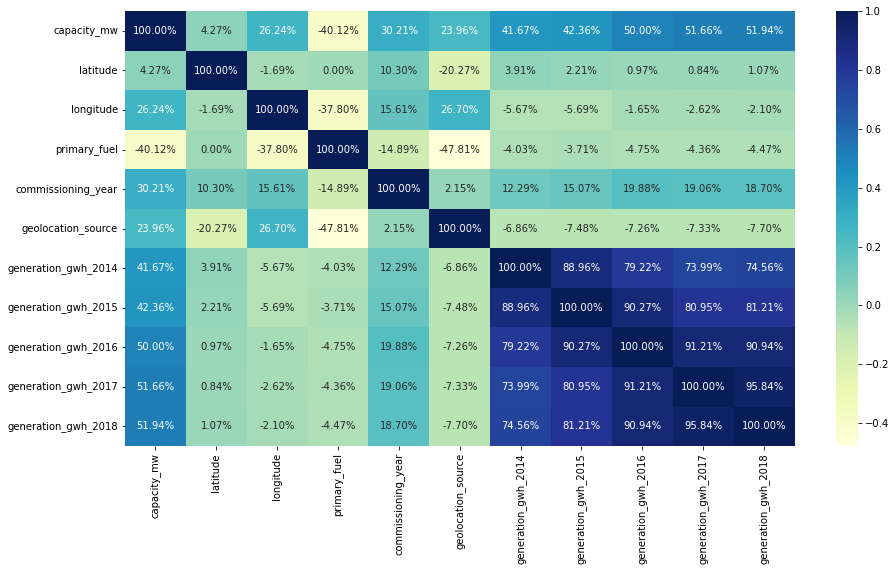

<Figure size 432x288 with 0 Axes>

In [173]:
plt.figure(figsize=(15,8))
sns.heatmap(df_new.corr(),annot=True,cmap='YlGnBu',fmt='.2%')
plt.figure()

In [176]:
# now selecting our feature and target variable for further process

x=df_new.drop('capacity_mw',axis=1)
y=df_new['capacity_mw']


print(x.shape)
print(y.shape)

(849, 10)
(849,)


In [175]:
#checking for skewness

x.skew()

latitude              -0.109823
longitude              0.921980
primary_fuel           0.408694
commissioning_year    -0.834063
geolocation_source    -2.062603
generation_gwh_2014    1.526648
generation_gwh_2015    1.389889
generation_gwh_2016    1.413144
generation_gwh_2017    1.278735
generation_gwh_2018    1.315481
dtype: float64

- threshold = +/- 0.50 , except latitude and primary_fuel , all the other feature variables are exceeding the threshold for skewness

In [177]:
x.columns

Index(['latitude', 'longitude', 'primary_fuel', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [178]:
#using power_transform method

from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')
x=pd.DataFrame(x,columns=['latitude', 'longitude', 'primary_fuel', 'commissioning_year',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'])
x.skew()

latitude              -0.069694
longitude              0.000035
primary_fuel          -0.059648
commissioning_year     0.031527
geolocation_source    -2.035892
generation_gwh_2014   -0.243975
generation_gwh_2015   -0.309166
generation_gwh_2016   -0.309194
generation_gwh_2017   -0.340677
generation_gwh_2018   -0.354764
dtype: float64

- skewness has been reduced for all the variables except for geolocation_source which is because it has imbalanced data

In [179]:
#checking multicollinearity with VIF

vif_calc()

   VIF Factor             features
0    1.068802             latitude
1    1.241595            longitude
2    1.438148         primary_fuel
3    1.111802   commissioning_year
4    1.410087   geolocation_source
5    4.186496  generation_gwh_2014
6    8.038324  generation_gwh_2015
7   11.895857  generation_gwh_2016
8   11.614477  generation_gwh_2017
9   12.354751  generation_gwh_2018


- 3 variables have VIF more than 10 , so we will drop the least correlated column with high VIF to reduce VIF and thus multicollinearity

In [180]:
x.drop('generation_gwh_2016', axis=1, inplace=True)

#again checking for VIF

vif_calc()

   VIF Factor             features
0    1.068159             latitude
1    1.237166            longitude
2    1.438134         primary_fuel
3    1.095451   commissioning_year
4    1.409921   geolocation_source
5    4.185228  generation_gwh_2014
6    5.300439  generation_gwh_2015
7   10.823132  generation_gwh_2017
8   11.434047  generation_gwh_2018


In [181]:
x.drop('generation_gwh_2017',axis=1,inplace=True)

#again checking for VIF

vif_calc()

   VIF Factor             features
0    1.067342             latitude
1    1.236158            longitude
2    1.437919         primary_fuel
3    1.094562   commissioning_year
4    1.409905   geolocation_source
5    4.184438  generation_gwh_2014
6    5.228844  generation_gwh_2015
7    3.118257  generation_gwh_2018


- okay so VIF has been reduced to below 6 only

In [182]:
#scaling the input data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [184]:
y.value_counts()

5.00       37
10.00      21
600.00     20
15.00      20
1200.00    19
           ..
32.50       1
119.80      1
21.84       1
195.00      1
106.60      1
Name: capacity_mw, Length: 331, dtype: int64

In [185]:
#importing the required library

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [186]:
lr=LinearRegression()

In [187]:
#checking best random state

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predlr=lr.predict(x_test)
    if round(r2_score(y_test,predlr)*100)==round(r2_score(y_train,predtrain)*100):
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',r2_score(y_train,predtrain)*100)
        print('Testing accuracy score is',r2_score(y_test,predlr)*100,'\n')

At random state 31 the model performs very well
At random state 31 :
Training accuracy score is 36.09824337546183
Testing accuracy score is 36.31728512853708 

At random state 51 the model performs very well
At random state 51 :
Training accuracy score is 36.2312137735454
Testing accuracy score is 36.41811001458555 

At random state 54 the model performs very well
At random state 54 :
Training accuracy score is 36.462630630028116
Testing accuracy score is 36.07570636832911 

At random state 95 the model performs very well
At random state 95 :
Training accuracy score is 36.05339859789619
Testing accuracy score is 36.062482505833295 



In [189]:
#let's take  as the random state

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=.30)
lr.fit(x_train,y_train)
predtrain=lr.predict(x_train)
predlr=lr.predict(x_test)

In [192]:
#checking cross validation score for LinearRegression

for j in range(2,10):
    lrs=cross_val_score(lr,x,y,cv=j)
    lrc=lrs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lrc*100)
    print('Accuracy score is:',r2_score(y_test,predlr)*100,'\n')

At cv= 2
Cross Validation Score is: 31.62076292227227
Accuracy score is: 36.41811001458555 

At cv= 3
Cross Validation Score is: 30.547211202478536
Accuracy score is: 36.41811001458555 

At cv= 4
Cross Validation Score is: 31.400360232547126
Accuracy score is: 36.41811001458555 

At cv= 5
Cross Validation Score is: 32.076654399491176
Accuracy score is: 36.41811001458555 

At cv= 6
Cross Validation Score is: 32.48832447431235
Accuracy score is: 36.41811001458555 

At cv= 7
Cross Validation Score is: 29.88830916261356
Accuracy score is: 36.41811001458555 

At cv= 8
Cross Validation Score is: 31.597334740128513
Accuracy score is: 36.41811001458555 

At cv= 9
Cross Validation Score is: 31.233050518003374
Accuracy score is: 36.41811001458555 



In [193]:
#checking error for LinearRegression

mselr=mean_squared_error(y_test,predlr)
maelr=mean_absolute_error(y_test,predlr)
print(mselr)
print(maelr)

119390.19241624502
252.13516332088386


# Regularization:

In [194]:
from sklearn.linear_model import Lasso,Ridge

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=.30)
ls=Lasso()
ls.fit(x_train,y_train)
predtrain=ls.predict(x_train)
predls=ls.predict(x_test)

In [196]:
#checking for cross validation score

for j in range(2,10):
    lss=cross_val_score(ls,x,y,cv=j)
    lsc=lss.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lsc*100)
    print('Accuracy score is:',r2_score(y_test,predls)*100,'\n')

At cv= 2
Cross Validation Score is: 31.898477969312143
Accuracy score is: 36.38880466291572 

At cv= 3
Cross Validation Score is: 30.8952543374892
Accuracy score is: 36.38880466291572 

At cv= 4
Cross Validation Score is: 31.711551188466725
Accuracy score is: 36.38880466291572 

At cv= 5
Cross Validation Score is: 32.29487789353171
Accuracy score is: 36.38880466291572 

At cv= 6
Cross Validation Score is: 32.66308080707599
Accuracy score is: 36.38880466291572 

At cv= 7
Cross Validation Score is: 30.1867743924352
Accuracy score is: 36.38880466291572 

At cv= 8
Cross Validation Score is: 31.75307912160858
Accuracy score is: 36.38880466291572 

At cv= 9
Cross Validation Score is: 31.395678084794277
Accuracy score is: 36.38880466291572 



In [197]:
#checking error for Lasso 

msels=mean_squared_error(y_test,predls)
maels=mean_absolute_error(y_test,predls)
print(msels)
print(maels)

119445.22021701485
251.84787408163075


In [198]:
lrr=Ridge()
lrr.fit(x_train,y_train)
predlrr=lrr.predict(x_test)
print(r2_score(y_test,predlrr)*100)

36.410121186609956


In [199]:
#checking for cross validation score

for j in range(2,10):
    lrrs=cross_val_score(lrr,x,y,cv=j)
    lrrc=lrrs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lrrc*100)
    print('Accuracy score is:',r2_score(y_test,predlrr)*100,'\n')

At cv= 2
Cross Validation Score is: 31.678947270343947
Accuracy score is: 36.410121186609956 

At cv= 3
Cross Validation Score is: 30.600982559894174
Accuracy score is: 36.410121186609956 

At cv= 4
Cross Validation Score is: 31.44469242298823
Accuracy score is: 36.410121186609956 

At cv= 5
Cross Validation Score is: 32.11475348106671
Accuracy score is: 36.410121186609956 

At cv= 6
Cross Validation Score is: 32.509349693533515
Accuracy score is: 36.410121186609956 

At cv= 7
Cross Validation Score is: 29.92025363118031
Accuracy score is: 36.410121186609956 

At cv= 8
Cross Validation Score is: 31.619831441864
Accuracy score is: 36.410121186609956 

At cv= 9
Cross Validation Score is: 31.254680775696354
Accuracy score is: 36.410121186609956 



In [200]:
#checking error for Ridge

mselrr=mean_squared_error(y_test,predlrr)
maelrr=mean_absolute_error(y_test,predlrr)
print(mselrr)
print(maelrr)

119405.19334983484
252.09630922267812


# Ensemble:

- In this section we will try some ensemble technique to find the best model and we will also try out some other regressors

In [201]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [202]:
ada=AdaBoostRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=.30)
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(r2_score(y_test,predada)*100)

60.65367194181404


In [203]:

#checking for cross validation score

for j in range(2,6):
    adas=cross_val_score(ada,x,y,cv=j)
    adac=adas.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',adac*100)
    print('Accuracy score is:',r2_score(y_test,predada)*100,'\n')

At cv= 2
Cross Validation Score is: 60.64703623964203
Accuracy score is: 60.65367194181404 

At cv= 3
Cross Validation Score is: 66.84832753071113
Accuracy score is: 60.65367194181404 

At cv= 4
Cross Validation Score is: 59.8340569485577
Accuracy score is: 60.65367194181404 

At cv= 5
Cross Validation Score is: 65.73285861206139
Accuracy score is: 60.65367194181404 



- okay so the model's performance has been improved with AdaBoost

In [204]:
#checking error for AdaBoost

mseada=mean_squared_error(y_test,predada)
maeada=mean_absolute_error(y_test,predada)
print(mseada)
print(maeada)

73882.13340020458
214.2537179654765


In [205]:
gb=GradientBoostingRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=.30)
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(r2_score(y_test,predgb)*100)

72.21328618626568


In [206]:
#checking for cross validation score

for j in range(2,6):
    gbs=cross_val_score(gb,x,y,cv=j)
    gbc=gbs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',gbc*100)
    print('Accuracy score is:',r2_score(y_test,predgb)*100,'\n')

At cv= 2
Cross Validation Score is: 73.64749040268954
Accuracy score is: 72.21328618626568 

At cv= 3
Cross Validation Score is: 75.33450371180366
Accuracy score is: 72.21328618626568 

At cv= 4
Cross Validation Score is: 73.61555321174953
Accuracy score is: 72.21328618626568 

At cv= 5
Cross Validation Score is: 73.8384542914279
Accuracy score is: 72.21328618626568 



In [207]:
#checking error for GradientBoosting

msegb=mean_squared_error(y_test,predgb)
maegb=mean_absolute_error(y_test,predgb)
print(msegb)
print(maegb)

52176.195290795724
104.79696005171114


In [209]:
knn=KNeighborsRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=.30)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(r2_score(y_test,predknn)*100)

65.4802639085041


In [210]:
#checking for cross validation score

for j in range(2,6):
    knns=cross_val_score(knn,x,y,cv=j)
    knnc=knns.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',knnc*100)
    print('Accuracy score is:',r2_score(y_test,predknn)*100,'\n')

At cv= 2
Cross Validation Score is: 63.47066365392888
Accuracy score is: 65.4802639085041 

At cv= 3
Cross Validation Score is: 65.97362941380051
Accuracy score is: 65.4802639085041 

At cv= 4
Cross Validation Score is: 65.35294836513387
Accuracy score is: 65.4802639085041 

At cv= 5
Cross Validation Score is: 65.67075029740204
Accuracy score is: 65.4802639085041 



In [211]:
#checking error for KNeighbors

mseknn=mean_squared_error(y_test,predknn)
maeknn=mean_absolute_error(y_test,predknn)
print(mseknn)
print(maeknn)

64819.053586911534
114.73833803921569


In [212]:
dtc=DecisionTreeRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=.30)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(r2_score(y_test,preddtc)*100)

62.02250151656602


In [213]:
#checking for cross validation score

for j in range(2,6):
    dtcs=cross_val_score(dtc,x,y,cv=j)
    dtcc=dtcs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',dtcc*100)
    print('Accuracy score is:',r2_score(y_test,preddtc)*100,'\n')

At cv= 2
Cross Validation Score is: 57.475612517456135
Accuracy score is: 62.02250151656602 

At cv= 3
Cross Validation Score is: 61.17915725089055
Accuracy score is: 62.02250151656602 

At cv= 4
Cross Validation Score is: 61.947773066532676
Accuracy score is: 62.02250151656602 

At cv= 5
Cross Validation Score is: 62.303337594245846
Accuracy score is: 62.02250151656602 



In [214]:
#checking error for DecisionTree

msedtc=mean_squared_error(y_test,preddtc)
maedtc=mean_absolute_error(y_test,preddtc)
print(msedtc)
print(maedtc)

71311.82876861568
116.26837254901962


In [215]:
rf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=.30)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf)*100)

73.79664308551129


In [216]:
#checking for cross validation score

for j in range(2,6):
    rfs=cross_val_score(rf,x,y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100)
    print('Accuracy score is:',r2_score(y_test,predrf)*100,'\n')

At cv= 2
Cross Validation Score is: 76.8737266644037
Accuracy score is: 73.79664308551129 

At cv= 3
Cross Validation Score is: 78.25015795253375
Accuracy score is: 73.79664308551129 

At cv= 4
Cross Validation Score is: 76.84953662325084
Accuracy score is: 73.79664308551129 

At cv= 5
Cross Validation Score is: 77.76029680343089
Accuracy score is: 73.79664308551129 



In [217]:
#checking error for RandomForest

mserf=mean_squared_error(y_test,predrf)
maerf=mean_absolute_error(y_test,predrf)
print(mserf)
print(maerf)

49203.06434253535
97.67998616791071


In [218]:
algodf=pd.DataFrame({'Mean Squared Error':[mselr,msels,mselrr,mseknn,msedtc,mseada,msegb,mserf],'Mean Absolute Error':[maelr,maels,maelrr,maeknn,maedtc,maeada,maegb,maerf],'Accuracy Score':[r2_score(y_test,predlr),r2_score(y_test,predls),r2_score(y_test,predlrr),r2_score(y_test,predknn),r2_score(y_test,preddtc),r2_score(y_test,predada),r2_score(y_test,predgb),r2_score(y_test,predrf)]},index=['LinearRegression','Lasso','Ridge','KNeighborsRegressor','DecisionTreeClassifier','AdaBoostRegressor','GradientBoostingRegressor','RandomForestRegressor'])
algodf

,Mean Squared Error,Mean Absolute Error,Accuracy Score
LinearRegression,119390.192416,252.135163,0.364181
Lasso,119445.220217,251.847874,0.363888
Ridge,119405.193350,252.096309,0.364101
KNeighborsRegressor,64819.053587,114.738338,0.654803
DecisionTreeClassifier,71311.828769,116.268373,0.620225
AdaBoostRegressor,73882.133400,214.253718,0.606537
GradientBoostingRegressor,52176.195291,104.796960,0.722133
RandomForestRegressor,49203.064343,97.679986,0.737966


- the errors are lowest with RandomForest adn the accuracy is highest with it as well

# Hyperparameter Tuning:

In [219]:
from sklearn.model_selection import GridSearchCV

In [220]:
parameters={'criterion':["squared_error", "absolute_error", "poisson"],'max_features':['sqrt','log2','auto']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=.30)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'absolute_error', 'max_features': 'log2'}


In [223]:
for i in range(100):
    rf=RandomForestRegressor(criterion='absolute_error',max_features='log2')
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    if round(r2_score(y_test,predrf)*100)==80:
        print('At random state:',i)
        print(r2_score(y_test,predrf)*100,'\n')

At random state: 11
79.55561825037026 

At random state: 36
79.79269297999396 

At random state: 42
80.21056961019568 

At random state: 47
80.03293021146234 

At random state: 62
80.2959746933826 

At random state: 64
79.50354520414632 

At random state: 95
79.90318123352729 



In [225]:
rf=RandomForestRegressor(criterion='absolute_error',max_features='log2')
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=.30)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2_score(y_test,predrf)*100

80.06321515681528

In [222]:
#checking for cross validation score

rf=RandomForestRegressor(criterion='absolute_error',max_features='log2')
for j in range(2,11):
    rfs=cross_val_score(rf,x,y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100,'\n')

At cv= 2
Cross Validation Score is: 78.26459506465523 

At cv= 3
Cross Validation Score is: 79.79938362396396 

At cv= 4
Cross Validation Score is: 78.59434406076683 

At cv= 5
Cross Validation Score is: 79.36124791658288 

At cv= 6
Cross Validation Score is: 79.60095208613592 

At cv= 7
Cross Validation Score is: 78.60689845375171 

At cv= 8
Cross Validation Score is: 80.00529366102539 

At cv= 9
Cross Validation Score is: 78.35307606185253 

At cv= 10
Cross Validation Score is: 78.92366503951284 



In [246]:
rf=RandomForestRegressor(criterion='absolute_error',max_features='log2')
rfs=cross_val_score(rf,x,y,cv=15)
rfc=rfs.mean()*100
rfc

80.20271080340608

In [248]:
print('The model is performing extremely well with RandomForestRegressor as we are getting both cross validation score and accuracy score as 80','\n')
print('Accuracy Score:', round(r2_score(y_test,predrf)*100))
print('Cross Validation Score:', round(rfc))

The model is performing extremely well with RandomForestRegressor as we are getting both cross validation score and accuracy score as 80 

Accuracy Score: 80
Cross Validation Score: 80


In [249]:
print('Mean Squared Error:',mean_squared_error(y_test,predrf))
print('Mean Absolute Error:',mean_absolute_error(y_test,predrf))

Mean Squared Error: 36426.21994805433
Mean Absolute Error: 88.93049843137254


In [250]:
preddf=pd.DataFrame({'Capacity_mw':y_test,'Predicted Capacity_mw':predrf})
preddf

,Capacity_mw,Predicted Capacity_mw
876,1260.00,1347.08000
100,20.00,18.23250
407,1.00,10.03800
103,750.00,598.18080
755,25.00,4.91500
...,...,...
705,6.60,23.30945
543,630.00,913.71500
500,14.65,32.81750
166,990.00,999.00300


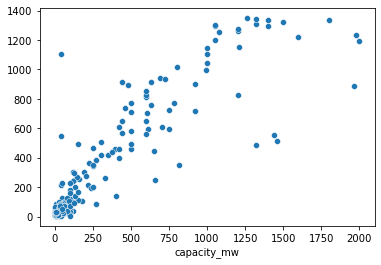

In [251]:
sns.scatterplot(y_test,predrf)
plt.show()

In [252]:
#saving the best model

import pickle
pickle.dump(rf,open('powerplantcapacity.pkl','wb'))